In [5]:
import jax.numpy as jnp

import pandas as pd

import make_df

import matplotlib.pyplot as plt

In [6]:
def fun(x):
    return (x[:,0]**2 + x[:,1] - 11)**2 / 800.0 + (x[:,0] + x[:,1]**2 -7)**2 / 800.0

In [7]:
# sparsification
sparse = True
subset_size = 0.1

if sparse:
    # directory where to save stuff
    in_dir = "./sparse"
    # How many derivative observations should be chosen
    list_d_vals = [200, 400, 800, 1500, 2000, 3000]
    # optimizer type
    optimizers = ["L-BFGS-B", "TNC", "SLSQP"]
else:
    # directory where to save stuff
    in_dir = "./full"
    # How many derivative observations should be chosen
    list_d_vals = [5, 20, 50, 100, 200, 400, 800, 1500, 2000]
    # optimizer type
    optimizers = ["L-BFGS-B", "SLSQP"]

# name of the function
name = "him"

# How many function observations should be chosen
list_f_vals = [1, 5, 20, 50]

# optimizer type
iters_per_optimmizer = 10

# Grid on which to evaluate the function
bounds = jnp.array([[-5.0, -5.0], [5.0, 5.0]])
eval_grid = jnp.linspace(bounds[0], bounds[1],100).T
eval_grid = jnp.array(jnp.meshgrid(*eval_grid)).reshape(2,-1).T

In [8]:
data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)

In [9]:
data.head(5)

,f,d,opt,mses,maxerrs,maxstds,true_in_confs,mean_mse,max_mse,min_mse,mean_tic,max_tic,min_tic
0,1,5,L-BFGS-B,"[0.09890565, 0.1858226, 0.1311223, 0.09886557,...","[0.9928411, 1.0879935, 1.0131807, 0.9928264, 1...","[0.3746619, 0.560483, 0.46887276, 0.3745122, 0...","[0.5822, 0.4851, 0.56159997, 0.5822, 0.46699998]",0.1492766,0.23166683,0.09886557,0.53562,0.5822,0.46699998
1,1,5,SLSQP,"[0.09891859, 0.09885852, 0.09891003, 0.0989146...","[0.9928466, 0.992826, 0.9928412, 0.99284315, 0...","[0.37467787, 0.37450725, 0.37468737, 0.3746984...","[0.5821, 0.5822, 0.5822, 0.5822, 0.5819]",0.09891719,0.09898414,0.09885852,0.58212006,0.5822,0.5819
2,1,20,L-BFGS-B,"[0.09910142, 0.09908983, 0.07202179, 0.0990930...","[1.0738277, 1.0737553, 0.9541311, 1.0737605, 0...","[0.29701582, 0.2970727, 0.39518517, 0.2970697,...","[0.1753, 0.17549999, 0.5415, 0.17549999, 0.5415]",0.08826526,0.09910142,0.07202021,0.32186,0.5415,0.1753
3,1,20,SLSQP,"[0.09911936, 0.09912062, 0.072030604, 0.099110...","[1.0737321, 1.0737736, 0.9541676, 1.0737729, 0...","[0.29705244, 0.2971695, 0.39517823, 0.29725134...","[0.17539999, 0.1753, 0.5412, 0.17559999, 0.5416]",0.08827739,0.09912062,0.072005525,0.32182,0.5416,0.1753
4,1,50,L-BFGS-B,"[0.022356702, 0.022360625, 0.022374474, 0.0223...","[0.3991288, 0.39914173, 0.3991999, 0.39903712,...","[0.30835977, 0.30838874, 0.30842373, 0.3083609...","[0.6868, 0.6867, 0.68659997, 0.687, 0.6867]",0.022358064,0.022374474,0.022337968,0.68676,0.687,0.68659997


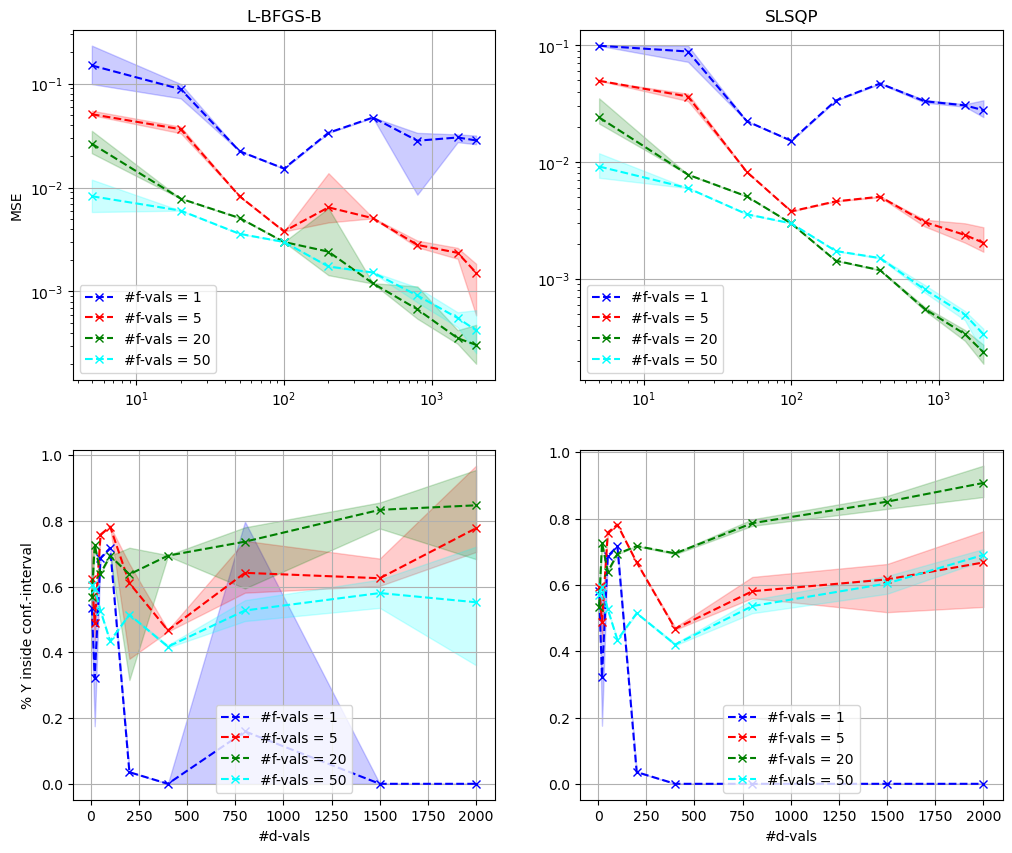

In [12]:
colors = ["b", "r", "g", "cyan"]

# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, optimizer in enumerate(optimizers):
    opt_data = data[data["opt"] == optimizer]
    for c,f in zip(colors, opt_data["f"].unique()):
        temp = opt_data[opt_data["f"] == f]
        dvals = temp["d"]

        mean_mse = temp["mean_mse"]
        min_mse = temp["min_mse"]
        max_mse = temp["max_mse"]
        ax[0,i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[0,i].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
        ax[0,i].set_yscale("log")
        ax[0,i].set_xscale("log")

        mean_tic = temp["mean_tic"]
        min_tic = temp["min_tic"]
        max_tic = temp["max_tic"]
        ax[1,i].plot(dvals, mean_tic, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[1,i].fill_between(dvals, min_tic.tolist(), max_tic.tolist(), color=c, alpha=0.2)


    ax[0,i].grid()
    ax[1,i].grid()
    ax[0,i].legend()
    ax[1,i].legend()
    ax[1,i].set_xlabel("#d-vals")
    ax[0,0].set_ylabel("MSE")
    ax[1,0].set_ylabel("% Y inside conf.-interval")
    ax[0,i].set_title(optimizer)